In [1]:
from pybaseball import statcast
from pybaseball import statcast_batter
from pybaseball import playerid_lookup
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
pid = playerid_lookup("kepler", "max")["key_mlbam"][0]
print(pid)
data = statcast_batter("2017-03-29", "2019-10-30", player_id=pid)
data.head()

Gathering player lookup table. This may take a moment.
596146
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2019-10-07,82.3,0.1407,6.2782,Max Kepler,596146,547973,strikeout,foul_tip,NaN,NaN,NaN,NaN,13.0,Max Kepler strikes out on a foul tip.,D,L,L,MIN,NYY,S,2.0,NaN,1,2,2019,-0.8968,-0.3080,-0.9069,1.4997,NaN,503556.0,543068.0,0,9,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,191008_044018,-0.6273,-119.8185,-3.6952,-8.5210,24.5648,-34.6052,3.3097,1.5584,NaN,NaN,NaN,82.495,2238.0,6.531,599344,547973,596142.0,518934.0,650402.0,570482.0,544369.0,457727.0,458731.0,592450.0,53.9684,NaN,NaN,0.0,1.0,0.0,0.0,NaN,74,4,Slider,1,5,1,5,5,1,1,5,Standard,Standard
1,SL,2019-10-07,82.5,0.3268,6.3431,Max Kepler,596146,547973,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,D,L,L,MIN,NYY,S,NaN,NaN,1,1,2019,-0.8216,-0.1196,-0.1134,2.2373,NaN,503556.0,543068.0,0,9,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,191008_043951,0.6169,-120.3592,-2.6953,-8.2223,21.4465,-33.0583,3.3397,1.5507,158.0,67.2,65.5,83.509,2395.0,6.633,599344,547973,596142.0,518934.0,650402.0,570482.0,544369.0,457727.0,458731.0,592450.0,53.8667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,3,Slider,1,5,1,5,5,1,1,5,Standard,Standard
2,SL,2019-10-07,83.1,0.3136,6.2890,Max Kepler,596146,547973,NaN,swinging_strike_blocked,NaN,NaN,NaN,NaN,13.0,NaN,D,L,L,MIN,NYY,S,NaN,NaN,1,0,2019,-0.7657,0.3990,-0.9551,0.5503,NaN,503556.0,543068.0,0,9,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,191008_043906,-1.4040,-120.8506,-7.4800,-7.2641,23.4407,-27.0037,3.3392,1.5777,NaN,NaN,NaN,83.348,2363.0,6.476,599344,547973,596142.0,518934.0,650402.0,570482.0,544369.0,457727.0,458731.0,592450.0,54.0236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,2,Slider,1,5,1,5,5,1,1,5,Standard,Standard
3,FF,2019-10-07,95.2,0.4677,6.2858,Max Kepler,596146,547973,NaN,ball,NaN,NaN,NaN,NaN,11.0,NaN,D,L,L,MIN,NYY,B,NaN,NaN,0,0,2019,0.2344,1.2686,-0.4486,4.2951,NaN,503556.0,543068.0,0,9,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,191008_043843,-2.9796,-138.8236,-2.5659,3.7269,29.2208,-15.0319,3.3414,1.5797,NaN,NaN,NaN,96.665,2379.0,6.877,599344,547973,596142.0,518934.0,650402.0,570482.0,544369.0,457727.0,458731.0,592450.0,53.6229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,1,4-Seam Fastball,1,5,1,5,5,1,1,5,Standard,Standard
4,SI,2019-10-07,94.1,0.8661,6.4262,Max Kepler,596146,502154,field_out,hit_into_play,NaN,NaN,NaN,NaN,2.0,Max Kepler flies out to right fielder Aaron Ju...,D,L,L,MIN,NYY,X,9.0,fly_ball,1,0,2019,1.2069,0.6903,0.1247,3.0833,NaN,NaN,543068.0,0,7,Bot,181.51,85.24,NaN,NaN,596142.0,NaN,191008_034032,-4.4343,-136.9339,-4.4475,15.7112,26.4270,-23.0470,3.4107,1.5623,299.0,89.6,39.8,93.177,2064.0,5.460,599344,502154,596142.0,518934.0,650402.0,570482.0,544369.0,457727.0,458731.0,592450.0,55.0392,0.018,0.027,0.0,1.0,0.0,0.0,3.0,55,2,Sinker,0,3,0,3,3,0,0,3,Infield shift,Standard


In [3]:
data = data[["pitch_type", "pitcher", "bat_score", "fld_score", "on_3b", "on_2b", "on_1b", "outs_when_up", "inning", "inning_topbot", "pitch_number", "p_throws", "balls", "strikes", "stand", "release_speed", "zone", "events"]]
data.head()

,pitch_type,pitcher,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,release_speed,zone,events
0,SL,547973,1,5,NaN,503556.0,543068.0,0,9,Bot,4,L,1,2,L,82.3,13.0,strikeout
1,SL,547973,1,5,NaN,503556.0,543068.0,0,9,Bot,3,L,1,1,L,82.5,5.0,NaN
2,SL,547973,1,5,NaN,503556.0,543068.0,0,9,Bot,2,L,1,0,L,83.1,13.0,NaN
3,FF,547973,1,5,NaN,503556.0,543068.0,0,9,Bot,1,L,0,0,L,95.2,11.0,NaN
4,SI,502154,0,3,NaN,NaN,543068.0,0,7,Bot,2,L,1,0,L,94.1,2.0,field_out


In [4]:
data[["on_3b", "on_2b", "on_1b"]] = data[["on_3b", "on_2b", "on_1b"]].replace(np.nan, 0)
data.loc[data.on_3b > 0, "on_3b"] = 1
data.loc[data.on_2b > 0, "on_2b"] = 1
data.loc[data.on_1b > 0, "on_1b"] = 1
data = data.dropna()

In [5]:
data.head()

,pitch_type,pitcher,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,release_speed,zone,events
0,SL,547973,1,5,0.0,1.0,1.0,0,9,Bot,4,L,1,2,L,82.3,13.0,strikeout
4,SI,502154,0,3,0.0,0.0,1.0,0,7,Bot,2,L,1,0,L,94.1,2.0,field_out
6,FF,592454,0,2,0.0,0.0,1.0,0,5,Bot,3,R,1,1,L,96.3,5.0,field_out
9,FF,622663,0,2,0.0,0.0,0.0,0,3,Bot,6,R,3,2,L,97.6,2.0,field_out
15,FF,622663,0,0,0.0,0.0,0.0,0,1,Bot,5,R,3,1,L,96.1,11.0,walk


In [6]:
data.tail()

,pitch_type,pitcher,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,release_speed,zone,events
6687,FF,453178,0,0,0.0,0.0,0.0,1,1,Bot,3,R,2,0,L,92.5,5.0,field_out
6690,FF,475243,7,1,0.0,1.0,1.0,2,7,Bot,5,L,2,2,L,90.9,2.0,strikeout
6695,FF,621381,1,1,0.0,0.0,1.0,0,7,Bot,4,L,2,1,L,91.9,5.0,single
6699,SL,518633,1,1,0.0,0.0,1.0,2,4,Bot,5,L,2,2,L,83.6,4.0,field_out
6704,FT,518633,0,0,0.0,1.0,1.0,2,2,Bot,6,L,2,2,L,94.3,4.0,strikeout


In [7]:
data["events"].value_counts()

field_out                     823
strikeout                     310
single                        197
walk                          176
double                         93
home_run                       75
force_out                      20
hit_by_pitch                   19
grounded_into_double_play      18
field_error                    16
sac_fly                        10
triple                          6
double_play                     6
strikeout_double_play           2
sac_bunt                        1
pickoff_caught_stealing_2b      1
fielders_choice_out             1
caught_stealing_2b              1
fielders_choice                 1
Name: events, dtype: int64

In [8]:
data = data[data.events != 'strikeout_double_play']
data = data[data.events != 'fielders_choice']
data = data[data.events != 'caught_stealing_2b']
data = data[data.events != 'fielders_choice_out']
data = data[data.events != 'pickoff_caught_stealing_2b']
data = data[data.events != 'double_play']
data = data[data.events != 'sac_bunt']
data = data[data.events != 'triple']
data = data[data.events != 'field_error']

In [9]:
data = pd.concat([data,pd.get_dummies(data["p_throws"], prefix='pitcher_throws')],axis=1)
data = pd.concat([data,pd.get_dummies(data["stand"], prefix='batter_stands')],axis=1)
data = pd.concat([data,pd.get_dummies(data["pitch_type"], prefix='p_type')],axis=1)
data = pd.concat([data,pd.get_dummies(data["inning_topbot"], prefix='inning')],axis=1)
data = pd.concat([data,pd.get_dummies(data["pitcher"], prefix='pitcher')],axis=1)
data.head()

,pitch_type,pitcher,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,release_speed,zone,events,pitcher_throws_L,pitcher_throws_R,batter_stands_L,p_type_CH,p_type_CU,p_type_EP,p_type_FC,p_type_FF,p_type_FS,p_type_FT,p_type_KC,p_type_SI,p_type_SL,inning_Bot,inning_Top,pitcher_112526,pitcher_282332,pitcher_407822,pitcher_407845,pitcher_408061,pitcher_424144,pitcher_425492,pitcher_425844,pitcher_429719,pitcher_430641,pitcher_430935,pitcher_432934,pitcher_433586,pitcher_433589,pitcher_434378,pitcher_434538,pitcher_434563,pitcher_434622,pitcher_434628,pitcher_434671,pitcher_434672,pitcher_444468,pitcher_444520,pitcher_445060,pitcher_445276,pitcher_445926,pitcher_446321,pitcher_446372,pitcher_446386,pitcher_446399,pitcher_448306,pitcher_448609,pitcher_448614,pitcher_448802,pitcher_448855,pitcher_450203,pitcher_450306,pitcher_451596,pitcher_451661,pitcher_453172,pitcher_453178,pitcher_453192,pitcher_453281,pitcher_453284,pitcher_453329,pitcher_453343,pitcher_453344,pitcher_453562,pitcher_455119,pitcher_456034,pitcher_456068,pitcher_456167,pitcher_456696,pitcher_456701,pitcher_456713,pitcher_457429,pitcher_457768,pitcher_457918,pitcher_458584,pitcher_458677,pitcher_458681,pitcher_458690,pitcher_458708,pitcher_460059,pitcher_461325,pitcher_461829,pitcher_461872,pitcher_462136,pitcher_462382,pitcher_465629,pitcher_465657,pitcher_467100,pitcher_468504,pitcher_471911,pitcher_472551,pitcher_474029,pitcher_474463,pitcher_475115,pitcher_475243,pitcher_476454,pitcher_476589,pitcher_487675,pitcher_488748,pitcher_488768,pitcher_488786,pitcher_488846,pitcher_488984,pitcher_489119,pitcher_489334,pitcher_489446,pitcher_490063,pitcher_491624,pitcher_493247,pitcher_500610,pitcher_500724,pitcher_500779,pitcher_500872,pitcher_501563,pitcher_501593,pitcher_501625,pitcher_501789,pitcher_501817,pitcher_501925,pitcher_501957,pitcher_501985,pitcher_501992,pitcher_502026,pitcher_502032,pitcher_502042,pitcher_502051,pitcher_502083,pitcher_502085,pitcher_502154,pitcher_502171,pitcher_502188,pitcher_502190,pitcher_502202,pitcher_502239,pitcher_502327,pitcher_502381,pitcher_502593,pitcher_502624,pitcher_502706,pitcher_502748,pitcher_503449,pitcher_504379,pitcher_516969,pitcher_517008,pitcher_517593,pitcher_518397,pitcher_518445,pitcher_518489,pitcher_518553,pitcher_518566,pitcher_518617,pitcher_518633,pitcher_518715,pitcher_518774,pitcher_518813,pitcher_518858,pitcher_518875,pitcher_518886,pitcher_519008,pitcher_519043,pitcher_519096,pitcher_519141,pitcher_519144,pitcher_519166,pitcher_519240,pitcher_519242,pitcher_519294,pitcher_519326,pitcher_519393,pitcher_519443,pitcher_519455,pitcher_521230,pitcher_527048,pitcher_532077,pitcher_533167,pitcher_541640,pitcher_541652,pitcher_542585,pitcher_542866,pitcher_542882,pitcher_542914,pitcher_542947,pitcher_542960,pitcher_543001,pitcher_543022,pitcher_543037,pitcher_543045,pitcher_543056,pitcher_543118,pitcher_543135,pitcher_543144,pitcher_543169,pitcher_543208,pitcher_543243,pitcher_543272,pitcher_543278,pitcher_543331,pitcher_543339,pitcher_543357,pitcher_543359,pitcher_543506,pitcher_543521,pitcher_543542,pitcher_543548,pitcher_543557,pitcher_543606,pitcher_543734,pitcher_543746,pitcher_543766,pitcher_543883,pitcher_543935,pitcher_543964,pitcher_544727,pitcher_544928,pitcher_545333,pitcher_547888,pitcher_547973,pitcher_548357,pitcher_548389,pitcher_552640,pitcher_570240,pitcher_570663,pitcher_570666,pitcher_571476,pitcher_571510,pitcher_571616,pitcher_571656,pitcher_571666,pitcher_571670,pitcher_571704,pitcher_571710,pitcher_571735,pitcher_571787,pitcher_571800,pitcher_571858,pitcher_571882,pitcher_571901,pitcher_571917,pitcher_571927,pitcher_571945,pitcher_571951,pitcher_572020,pitcher_572021,pitcher_572070,pitcher_572140,pitcher_572143,pitcher_572193,pitcher_572403,pitcher_572703,pitcher_572750,pitcher_572888,pitcher_573127,pitcher_573185,pitcher_573186,pitcher_573589,pitcher_573668,pitcher_579328,pitcher_580792,pitcher_582494,pitcher_584171,pitcher_

In [10]:
data = data.drop(['pitch_type', 'inning_topbot', 'p_throws', 'stand'], axis=1)
data.head()

,pitcher,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,zone,events,pitcher_throws_L,pitcher_throws_R,batter_stands_L,p_type_CH,p_type_CU,p_type_EP,p_type_FC,p_type_FF,p_type_FS,p_type_FT,p_type_KC,p_type_SI,p_type_SL,inning_Bot,inning_Top,pitcher_112526,pitcher_282332,pitcher_407822,pitcher_407845,pitcher_408061,pitcher_424144,pitcher_425492,pitcher_425844,pitcher_429719,pitcher_430641,pitcher_430935,pitcher_432934,pitcher_433586,pitcher_433589,pitcher_434378,pitcher_434538,pitcher_434563,pitcher_434622,pitcher_434628,pitcher_434671,pitcher_434672,pitcher_444468,pitcher_444520,pitcher_445060,pitcher_445276,pitcher_445926,pitcher_446321,pitcher_446372,pitcher_446386,pitcher_446399,pitcher_448306,pitcher_448609,pitcher_448614,pitcher_448802,pitcher_448855,pitcher_450203,pitcher_450306,pitcher_451596,pitcher_451661,pitcher_453172,pitcher_453178,pitcher_453192,pitcher_453281,pitcher_453284,pitcher_453329,pitcher_453343,pitcher_453344,pitcher_453562,pitcher_455119,pitcher_456034,pitcher_456068,pitcher_456167,pitcher_456696,pitcher_456701,pitcher_456713,pitcher_457429,pitcher_457768,pitcher_457918,pitcher_458584,pitcher_458677,pitcher_458681,pitcher_458690,pitcher_458708,pitcher_460059,pitcher_461325,pitcher_461829,pitcher_461872,pitcher_462136,pitcher_462382,pitcher_465629,pitcher_465657,pitcher_467100,pitcher_468504,pitcher_471911,pitcher_472551,pitcher_474029,pitcher_474463,pitcher_475115,pitcher_475243,pitcher_476454,pitcher_476589,pitcher_487675,pitcher_488748,pitcher_488768,pitcher_488786,pitcher_488846,pitcher_488984,pitcher_489119,pitcher_489334,pitcher_489446,pitcher_490063,pitcher_491624,pitcher_493247,pitcher_500610,pitcher_500724,pitcher_500779,pitcher_500872,pitcher_501563,pitcher_501593,pitcher_501625,pitcher_501789,pitcher_501817,pitcher_501925,pitcher_501957,pitcher_501985,pitcher_501992,pitcher_502026,pitcher_502032,pitcher_502042,pitcher_502051,pitcher_502083,pitcher_502085,pitcher_502154,pitcher_502171,pitcher_502188,pitcher_502190,pitcher_502202,pitcher_502239,pitcher_502327,pitcher_502381,pitcher_502593,pitcher_502624,pitcher_502706,pitcher_502748,pitcher_503449,pitcher_504379,pitcher_516969,pitcher_517008,pitcher_517593,pitcher_518397,pitcher_518445,pitcher_518489,pitcher_518553,pitcher_518566,pitcher_518617,pitcher_518633,pitcher_518715,pitcher_518774,pitcher_518813,pitcher_518858,pitcher_518875,pitcher_518886,pitcher_519008,pitcher_519043,pitcher_519096,pitcher_519141,pitcher_519144,pitcher_519166,pitcher_519240,pitcher_519242,pitcher_519294,pitcher_519326,pitcher_519393,pitcher_519443,pitcher_519455,pitcher_521230,pitcher_527048,pitcher_532077,pitcher_533167,pitcher_541640,pitcher_541652,pitcher_542585,pitcher_542866,pitcher_542882,pitcher_542914,pitcher_542947,pitcher_542960,pitcher_543001,pitcher_543022,pitcher_543037,pitcher_543045,pitcher_543056,pitcher_543118,pitcher_543135,pitcher_543144,pitcher_543169,pitcher_543208,pitcher_543243,pitcher_543272,pitcher_543278,pitcher_543331,pitcher_543339,pitcher_543357,pitcher_543359,pitcher_543506,pitcher_543521,pitcher_543542,pitcher_543548,pitcher_543557,pitcher_543606,pitcher_543734,pitcher_543746,pitcher_543766,pitcher_543883,pitcher_543935,pitcher_543964,pitcher_544727,pitcher_544928,pitcher_545333,pitcher_547888,pitcher_547973,pitcher_548357,pitcher_548389,pitcher_552640,pitcher_570240,pitcher_570663,pitcher_570666,pitcher_571476,pitcher_571510,pitcher_571616,pitcher_571656,pitcher_571666,pitcher_571670,pitcher_571704,pitcher_571710,pitcher_571735,pitcher_571787,pitcher_571800,pitcher_571858,pitcher_571882,pitcher_571901,pitcher_571917,pitcher_571927,pitcher_571945,pitcher_571951,pitcher_572020,pitcher_572021,pitcher_572070,pitcher_572140,pitcher_572143,pitcher_572193,pitcher_572403,pitcher_572703,pitcher_572750,pitcher_572888,pitcher_573127,pitcher_573185,pitcher_573186,pitcher_573589,pitcher_573668,pitcher_579328,pitcher_580792,pitcher_582494,pitcher_584171,pitcher_592094,pitcher_592102,pitcher_592130,pit

In [11]:
categoricalMask = data.dtypes==object
categoricalCols = data.columns[categoricalMask].tolist()
categoricalCols

['events']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[categoricalCols] = data[categoricalCols].apply(lambda col: le.fit_transform(col))
data = data.sample(frac=1).reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

features = data.drop("events", 1).columns.tolist()
X = data[features]
y = data["events"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [14]:
print(features)

['pitcher', 'bat_score', 'fld_score', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'pitch_number', 'balls', 'strikes', 'release_speed', 'zone', 'pitcher_throws_L', 'pitcher_throws_R', 'batter_stands_L', 'p_type_CH', 'p_type_CU', 'p_type_EP', 'p_type_FC', 'p_type_FF', 'p_type_FS', 'p_type_FT', 'p_type_KC', 'p_type_SI', 'p_type_SL', 'inning_Bot', 'inning_Top', 'pitcher_112526', 'pitcher_282332', 'pitcher_407822', 'pitcher_407845', 'pitcher_408061', 'pitcher_424144', 'pitcher_425492', 'pitcher_425844', 'pitcher_429719', 'pitcher_430641', 'pitcher_430935', 'pitcher_432934', 'pitcher_433586', 'pitcher_433589', 'pitcher_434378', 'pitcher_434538', 'pitcher_434563', 'pitcher_434622', 'pitcher_434628', 'pitcher_434671', 'pitcher_434672', 'pitcher_444468', 'pitcher_444520', 'pitcher_445060', 'pitcher_445276', 'pitcher_445926', 'pitcher_446321', 'pitcher_446372', 'pitcher_446386', 'pitcher_446399', 'pitcher_448306', 'pitcher_448609', 'pitcher_448614', 'pitcher_448802', 'pitcher_448855', '

In [15]:
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())
smote = SMOTE("all")
X_train, y_train = smote.fit_sample(X_train, y_train)
print(y_train.value_counts())

Using TensorFlow backend.
1    664
8    234
7    156
9    140
0     75
5     63
2     20
4     16
3     15
6      9
Name: events, dtype: int64
7    664
3    664
6    664
2    664
9    664
5    664
1    664
8    664
4    664
0    664
Name: events, dtype: int64


In [16]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy = dtree_model.score(X_test, y_test)
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)
print(accuracy)

[[ 9  1  1  1  2  0  0  0  4  0]
 [67 24  4  4 10  9  3  5 26  7]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  1]
 [ 6  3  1  1  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [21  3  1  0  2  5  0  1  6  2]
 [ 3 18  7  6  2  0  0  2 36  2]
 [ 0  4  0  0  0  0  0  1  3 28]]
0.28939828080229224


In [17]:
from keras.utils import to_categorical
num_classes=len(data["events"].unique())
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow as tf


def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(len(features),), activation='relu', name='fc1'), #layer 1
    tf.keras.layers.Dense(8, activation='relu', name='fc2'), #layer 2
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output')
  ])

  model.compile(optimizer='adam', 
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(X_train, y_train, batch_size=5, epochs=200)

W0220 17:09:19.250148 139917388482368 deprecation.py:506] From /home/parker/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0220 17:09:19.470692 139917388482368 deprecation.py:323] From /home/parker/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
6640/6640 [==============================] - 2s 291us/sample - loss: 0.3251 - acc: 0.9000
Epoch 2/200
6640/6640 [==============================] - 2s 276us/sample - loss: 0.3252 - acc: 0.9000
Epoch 3/200


KeyboardInterrupt: 

In [19]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

349/349 [==============================] - 0s 93us/sample - loss: 0.3234 - acc: 0.9000
Final test set loss: 0.323390
Final test set accuracy: 0.900000


In [20]:
events = le.inverse_transform(data["events"].unique())
events

array(['field_out', 'single', 'walk', 'strikeout', 'hit_by_pitch',
       'double', 'home_run', 'force_out', 'grounded_into_double_play',
       'sac_fly'], dtype=object)

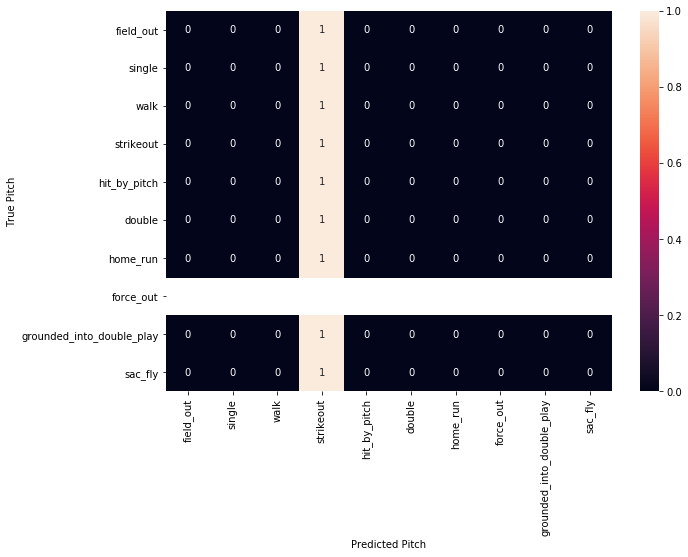

In [21]:
actual = [np.argmax(y, axis=None, out=None) for y in y_test]

y_pred = model.predict_classes(X_test)
y_true = actual

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=data["events"].unique())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm, index = events,
                  columns = events)

plt.figure(figsize = (10,7))
cm = sn.heatmap(df_cm, annot=True)
cm.set_ylabel("True Pitch")
cm.set_xlabel("Predicted Pitch")
cm